<a href="https://colab.research.google.com/github/code4tomorrow/machine-learning/blob/main/Simple_Linear_Regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Machine Learning: Simple Linear Regression**

In this notebook, we will attempt to implement Simple Linear Regression on a Physics dataset. 

In particular, this dataset contains the movement of a marble in its horizontal and vertical coordinates and the time since the motion began. You will see how to use Simple Linear Regression to predict the future horizontal coordinate of the marble when given the time, and you can then implement one to predict the future vertical coordinate.

Let us first import the required libraries: NumPy and Pandas.

In [ ]:
import numpy as np
import pandas as pd

Now let's upload data into the notebook. Click the button "Choose Files" and upload the file 'Marble.csv'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Marble #3.csv to Marble #3.csv


Now by using read_csv(), let's put our data into a dataframe.

In [ ]:
df = pd.read_csv("Marble #3.csv")

Let's see what the data set looks like:

In [ ]:
df.head(-5)

,t(s),x(m),y(m)
0,0.000000,-0.66446,0.43275
1,0.004167,-0.66957,0.43445
2,0.008333,-0.66787,0.43275
3,0.012500,-0.66787,0.43275
4,0.016667,-0.66446,0.42934
...,...,...,...
168,0.700000,0.46001,-0.39186
169,0.704167,0.47194,-0.41742
170,0.708333,0.48046,-0.42934
171,0.712500,0.48897,-0.44297


Now let's scatter plot the horizontal coordinate denoted by x(m) against the time denoted by t(s), to see what shape the scatter plot indicates.

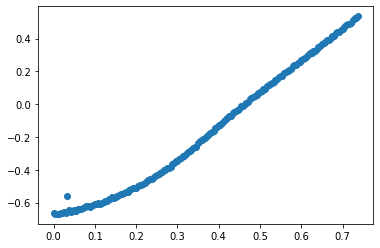

In [ ]:
plt.scatter(df[["t(s)"]],df[["x(m)"]])

Now let's perform the train-test split. 0.8 is a good standard, meaning that we take roughly 80% of the data as training and 20% as testing.

In [ ]:
msk = np.random.rand(len(df))<0.8
train = df[msk]
test = df[~msk]
train_t = train[["t(s)"]]
train_x = train[["x(m)"]]
test_t = test[["t(s)"]]
test_x = test[["x(m)"]]

Now for the actual Linear Regression. 

First we import the linear_model library from sklearn.

In [ ]:
from sklearn import linear_model

Then we create a LinearRegression object, which can then automatically fit a line to the data. Since we are only inputting one feature, this is simple Linear Regression.

In [ ]:
regr = linear_model.LinearRegression()

The *fit* function of a LinearRegression object takes the training input and output, and fits a curve to it.

In [ ]:
regr.fit(train_t,train_x)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now, we can plot the fitted curve and the data scatterplot together. *regr.coef_* gives you access to the coefficient used, and *regr.intercept_* gives you the intercept.

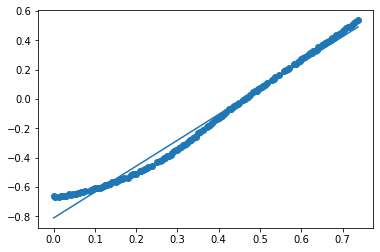

In [ ]:
plt.scatter(train_t,train_x)
plt.plot(train_t,regr.coef_*train_t+regr.intercept_)

However, as we discussed, we don't evaluate Regression using the training data set. So let's try this out for the test data set we created earlier.

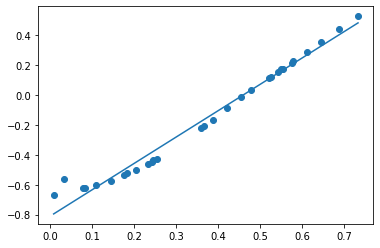

In [ ]:
plt.scatter(test_t,test_x)
plt.plot(test_t,regr.coef_*test_t+regr.intercept_)

We'll discuss ways to evaluate a ML model later, but just eyeballing it, this looks like a pretty good fit! Let's try to predict where the marble will be(horizontally) at 0.8s, since that is beyond the range of the data.

In [ ]:
tester = np.array([[0.8]])
regr.predict(tester)

array([[0.60125612]])

Eyeballing once again, this looks fairly reasonable given the graph. The above section was really just to demonstrate the *.predict* function.

Now, it's your turn. Try to run Linear Regression on y(m) and t(s).

In [ ]:
train_y = np.asanyarray(train[["y(m)"]]) #Here's the y-column of the training data set
test_y = np.asanyarray(test[["y(m)"]]) #Here's the y-column of the test data set 

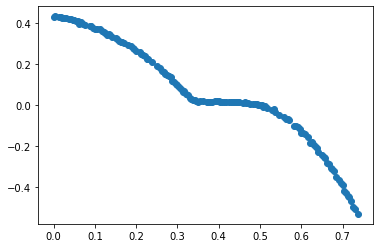

In [ ]:
plt.scatter(train_t,train_y) #Here's a scatter plot of y(m) vs t(s)

Create a new LinearRegression object, regrTwo.

In [ ]:
from sklearn import linear_model
          #Create a new LinearRegression object here

Fit this to *train_t* and *train_y*

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Create a variable named *test_y_pred* which contains the predictions based on the test inputs. The function *predict()* of regrTwo is a more sustainable alternative to directly using the coefficients and intercepts created. The only parameter to this function is the input data, here, *test_t*

Scatter *test_t* against *test_y*.

Plot *test_t* against *test_y_pred*

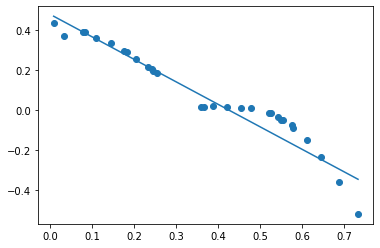

And that's it! 

If you did this all right, the line you see above should be fairly close to the curve. This data is not very linear, so don't worry if your model doesn't look too accurate. It just needs to model the general trend.

You can refer to the example above: Try out the time 0.8s

Where is the marble vertically now?

*Something close to -0.4 should be about right.*

array([[-0.42140737]])

Congratulations, you've run your first round of Simple Linear Regression. In the next chapters, we'll study more complex forms of Regression, but they're all based on the foundations you learned today.